In [1]:
from model import *

In [2]:
#input_file = input('Enter CSV File:')
input_file = 'train_data_exteneded.csv'
df = pd.read_csv(input_file)
y = df['label']
x = df[['happy','angry','disgust','sad','fear','neutral','surprise','Pitch1','Pitch2','Pitch3','Pitch4','Pitch5','Pitch6','Pitch7','Pitch8','Pitch9','Pitch10','Pitch11','Pitch12']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

# XGBoostClassifier


In [3]:
y_train_pred_x, y_test_pred_x, xreg = xgbreg(x_train, x_test, y_train, y_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_x))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_x))
print()

scores = cross_val_score(xreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9608540925266904
Mean Squared Error (MSE) 	: 0.03914590747330961

Cross_val_Scores: [0.95857988 0.95266272 0.94047619 0.97619048 0.92261905]


Variable: happy Importance: 0.4699999988079071
Variable: Pitch8 Importance: 0.07000000029802322
Variable: disgust Importance: 0.05999999865889549
Variable: surprise Importance: 0.05999999865889549
Variable: neutral Importance: 0.05000000074505806
Variable: angry Importance: 0.03999999910593033
Variable: sad Importance: 0.03999999910593033
Variable: Pitch10 Importance: 0.029999999329447746
Variable: Pitch11 Importance: 0.029999999329447746
Variable: fear Importance: 0.019999999552965164
Variable: Pitch1 Importance: 0.019999999552965164
Variable: Pitch2 Importance: 0.019999999552965164
Variable: Pitch9 Importance: 0.019999999552965164
Variable: Pitch4 Importance: 0.009999999776482582
Variable: Pitch5 Importance: 0.009999999776482582
Variable: Pitch6 Importance: 0.009999999776482582
Variable: Pitch7 Importance: 0.009999999776482582
Variable: Pitch12 Importance: 0.009999999776482582
Variable: Pitch3 Importance: 0.0


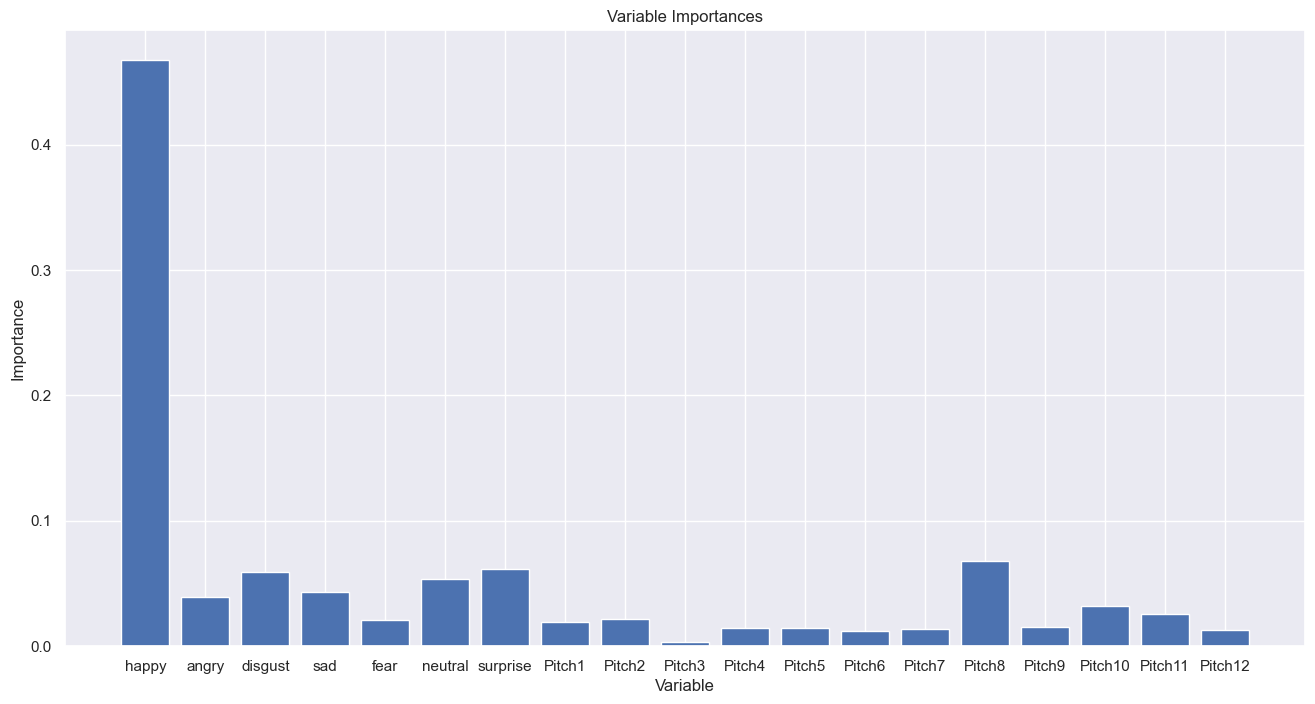

In [4]:
importances = list(xreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Logistic Regression


In [5]:
y_train_pred_log, y_test_pred_log, logreg = logireg(x_train, x_test, y_train, y_test)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_log))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_log))
print()

scores = cross_val_score(logreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8646080760095012
Mean Squared Error (MSE) 	: 0.13539192399049882

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8612099644128114
Mean Squared Error (MSE) 	: 0.1387900355871886

Cross_val_Scores: [0.84615385 0.83431953 0.85714286 0.91071429 0.83928571]


# Random Forest

In [6]:
y_train_pred_for, y_test_pred_for, base = forreg(x_train, x_test, y_train, y_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_for))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_for))
print()

scores = cross_val_score(base, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9501779359430605
Mean Squared Error (MSE) 	: 0.0498220640569395

Cross_val_Scores: [0.96449704 0.94674556 0.94642857 0.98214286 0.91071429]


Variable: happy Importance: 0.24
Variable: sad Importance: 0.15
Variable: angry Importance: 0.13
Variable: disgust Importance: 0.08
Variable: surprise Importance: 0.08
Variable: Pitch11 Importance: 0.04
Variable: fear Importance: 0.03
Variable: neutral Importance: 0.03
Variable: Pitch8 Importance: 0.03
Variable: Pitch10 Importance: 0.03
Variable: Pitch1 Importance: 0.02
Variable: Pitch2 Importance: 0.02
Variable: Pitch3 Importance: 0.02
Variable: Pitch4 Importance: 0.02
Variable: Pitch7 Importance: 0.02
Variable: Pitch9 Importance: 0.02
Variable: Pitch12 Importance: 0.02
Variable: Pitch5 Importance: 0.01
Variable: Pitch6 Importance: 0.01


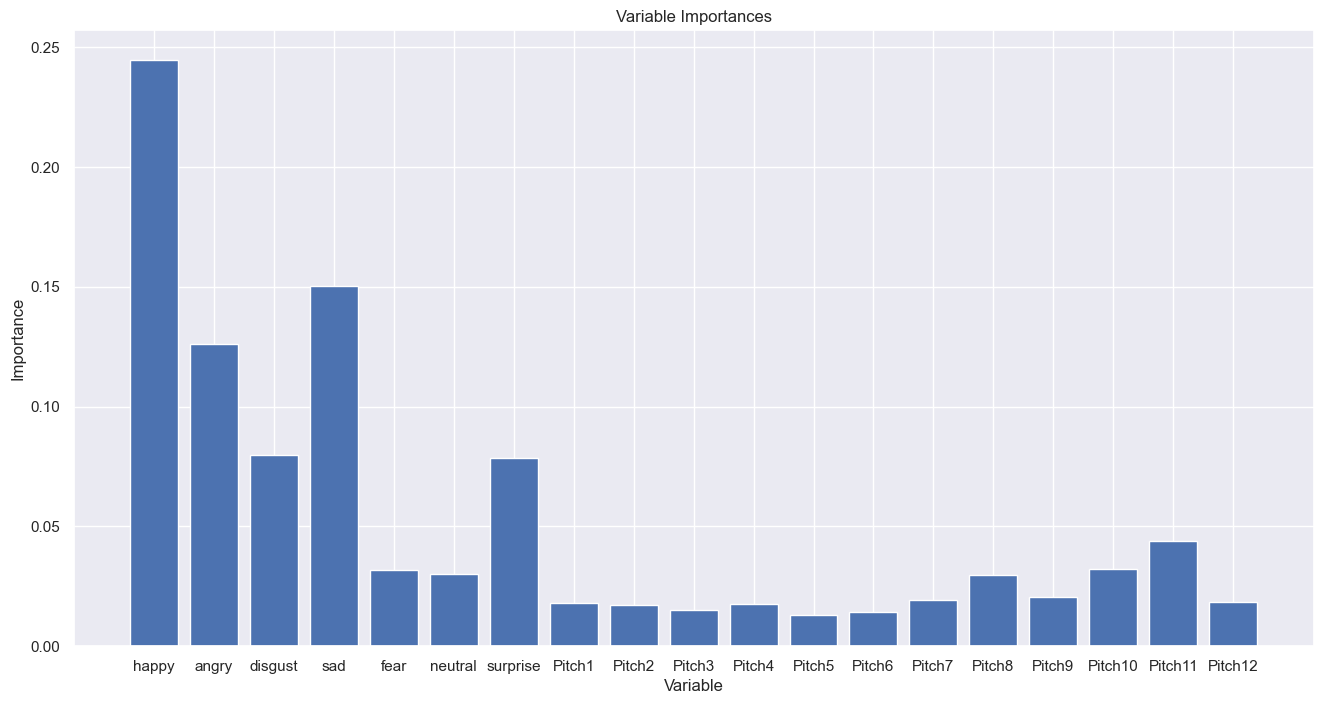

In [7]:
importances = list(base.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Keras

In [8]:
y_train_pred_ker_correct, y_test_pred_ker_correct, model = kerreg(x_train, x_test, y_train, y_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2(y_train_pred_ker_correct,y_train))
print("Mean Squared Error (MSE) \t:", mse(y_train_pred_ker_correct,y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2(y_test_pred_ker_correct,y_test))
print("Mean Squared Error (MSE) \t:", mse(y_test_pred_ker_correct,y_test))
print()

Epoch 1/150
85/85 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.6283
Epoch 2/150
85/85 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.7411
Epoch 3/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0.8266
Epoch 4/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.8504
Epoch 5/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.8527
Epoch 6/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.8527
Epoch 7/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1206 - accuracy: 0.8468
Epoch 8/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.8610
Epoch 9/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.8563
Epoch 10/150
85/85 [==============================] - 0s 2ms/step - loss: 0.1125 - accuracy: 0.8575
Epoch 11/